In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [6]:
import numpy as np

In [7]:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, shuffle=False, random_state=42)

In [7]:
#  8.4   2.11  1.41

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
poly_nominal = PolynomialFeatures(include_bias=False)
poly_nominal.fit(train_input)
train_poly=poly_nominal.transform(train_input)

In [10]:
train_poly[0]

array([ 8.4   ,  2.11  ,  1.41  , 70.56  , 17.724 , 11.844 ,  4.4521,
        2.9751,  1.9881])

In [11]:
train_poly[0][0:3]

array([8.4 , 2.11, 1.41])

In [12]:
train_poly[0][0:3]**2

array([70.56  ,  4.4521,  1.9881])

In [8]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, shuffle=True, random_state=42)

## 다중 회귀 모델 훈련하기

In [9]:
from sklearn.linear_model import LinearRegression

In [13]:
poly_nominal = PolynomialFeatures(include_bias=False)
poly_nominal.fit(train_input)
train_poly=poly_nominal.transform(train_input)

In [ ]:
# 훈련세트에 대한 평가

In [14]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


In [ ]:
#테스트세트에 대한 평가

In [15]:
poly_nominal.fit(test_input)
test_poly=poly_nominal.transform(test_input)

In [16]:
print(lr.score(test_poly, test_target))

0.9714559911594145


In [17]:
# 정규화(표준화-평균0,분산1)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc=StandardScaler()

In [22]:
train_poly[:,0]

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [27]:
train_poly[:,0].mean()

28.445238095238096

In [28]:
train_poly[:,0].std()

8.728311961955496

In [29]:
(19.6 - 28.445238095238096) / 8.728311961955496

-1.0133961909006288

In [32]:
# 반드시 훈련 세트로 학습한 변환기를 사용해 테스트 세트까지 변환해야함

In [30]:
sc.fit(train_poly)
train_scaled=sc.transform(train_poly)
test_scaled=sc.transform(test_poly)

In [31]:
train_scaled

array([[-1.01339619, -1.01007487, -1.01952321, -0.9549757 , -0.9496784 ,
        -0.95745849, -0.93942079, -0.94342509, -0.94100107],
       [-0.73842893, -0.75254307, -0.74466913, -0.76472563, -0.7717585 ,
        -0.77238267, -0.7747325 , -0.77298293, -0.76716811],
       [-1.11650891, -0.98919391, -0.97371419, -1.02065999, -0.9714645 ,
        -0.97031097, -0.92689165, -0.92331614, -0.91379551],
       [-1.26544951, -1.20148364, -1.07678447, -1.11008743, -1.0794873 ,
        -1.04481394, -1.04749571, -1.01503633, -0.97401432],
       [ 0.86554673,  0.89357239,  1.09914363,  0.78258063,  0.79878122,
         0.93990033,  0.80045116,  0.93459078,  1.05668676],
       [-0.39471986, -0.55765413, -0.65305111, -0.49604314, -0.5750369 ,
        -0.62146959, -0.63540138, -0.67211558, -0.70357069],
       [ 1.3238255 ,  1.35295344,  1.31101032,  1.3618677 ,  1.39093563,
         1.37273894,  1.40131663,  1.38189727,  1.33959041],
       [ 1.2092558 ,  1.52696142,  1.44843736,  1.21132928,  1

In [33]:
# 기준 0.9714559911594145

In [34]:
# 릿지(L2) : 계수를 제곱한 값을 기준으로 적용

from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9857915060511934


In [35]:

print(ridge.score(test_scaled, test_target))

0.9835057194929058


In [36]:

import matplotlib.pyplot as plt

train_score = []
test_score = []

In [37]:

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

In [38]:
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

C:\Users\kds\AppData\Local\Temp\ipykernel_5636\2876504569.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


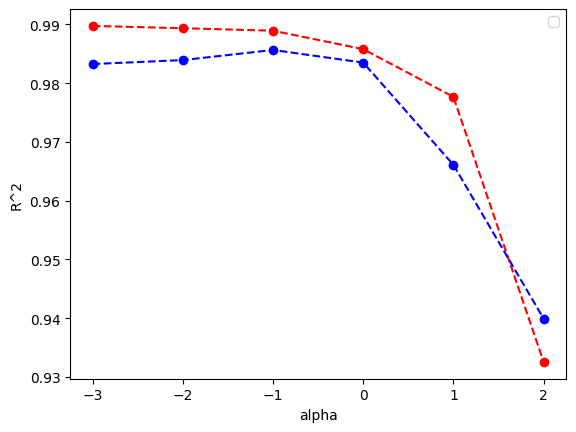

In [40]:

plt.plot(np.log10(alpha_list), train_score, "o--r")
plt.plot(np.log10(alpha_list), test_score, "o--b")
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

In [41]:

ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9889354346720892
0.9856564835209132


## 라쏘

In [42]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.986591255464559


In [43]:

print(lasso.score(test_scaled, test_target))

0.9846056618190413


In [44]:

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

c:\ProgramData\anaconda3\envs\mldltest2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.466e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
c:\ProgramData\anaconda3\envs\mldltest2\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.739e+03, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


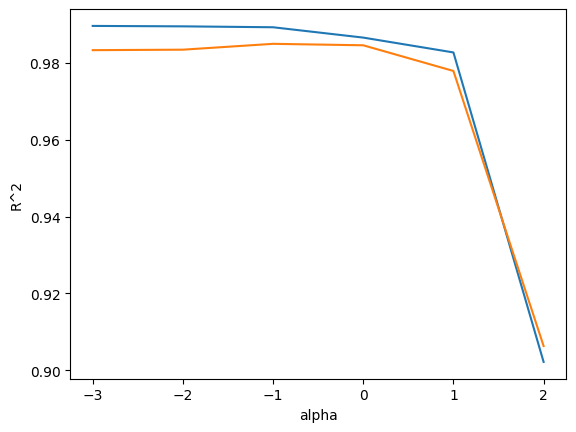

In [45]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [46]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9827254657543516
0.9778291802263332
